# Cómo funcionan de las redes neuronales?

La *red neuronal artificial* es un modelo computacional inspirado en las red neuronal biológica que procesa la información en el cerebro humano. Las redes neuronales artificiales hicieron una serie de avances en el campo de reconocimiento de voz, la visión por computadora y el procesamiento de texto.

<img src="ima_tuto/perceptron_ima.jpeg" width="400" height="800">

## Perceptrón  y Perceptrón Multicapa

A mediados del siglo pasado aparece un primer modelo de lo que es una neurona (1943-McCullogh y Pitts), tratando de emular lo que hace una neurona del cerebro humano. Tiempo después se da la idea de asignarle pesos a los datos de entrada (1949-Hebb). Con esto ya se da la idea de lo que podría ser el perceptrón (1958-Rosenblat). Poco más de 10 años después se critíca que el perceptrón puede clasificar cosas, pero no tadas (1969-Minsky y Papert puerta XOR). Nuevamente casi 10 después se da la solución para clasificar cualquier cosa y se creo lo que se conoce como perceptrón multicapa (1974-P.Werbos --- tesis doctoral). Finalmente en 1986 Rumelhart y McCelland aplican la retropropagación al perceptron multicapa.     

El *perceptrón* es la unidad básica de procesamiento en una red neuronal. Se tienen *n* entradas "x" conectadas arbitrariamente, que son designadas como valores o elementos. El trabajo del perceptrón es recibir, procesar y enviar un valor de salida "y". El estimulo viene dado por los pesos sinópticos *w* y el parámetro de *bias* (b). Estos pesos y el bias son los parámetros del modelo, los cuales le permitirán a la red ser optimizada. 

La neurona recibe los datos de entrada para realizar una *suma ponderada* de ellos, la ponderación viene dada por el peso que se le asigna a cada una de las conexiones de entrada más un término de bias que después será evaluda por una *función de activación*. La función de activación es una función no lineal que puede tener diferentes formas según a convenienca del modelo.

<img src="ima_tuto/perceptron.png" width="400" height="800">

$$
\begin{equation}
Z = \sum_{i=1}^{n} W_{i}\cdot x_{i} + W_{0} \hspace{2cm} ϕ(Z) = \Big \{ \begin{matrix} 1 & \mbox{si }Z\geq 0.
\\ 0 & \mbox{si }Z < 0.\end{matrix}  \hspace{2cm}   w_{n+1} = w_{n} + α \Delta x_{n} \hspace{2cm} \mbox{Error} = Y_{p} - Y_{r}
\end{equation}
$$

$$
\begin{eqnarray}
&& W_{0} + W_{1}· x_{i} + W_{2}· x_{2} = 0 \hspace{2cm} y = \frac{-(W_{0}+W_{1}· x)}{W_{2}} \\  \\ 
&& W_{0} + W_{1}· x + W_{2}· y = 0
\end{eqnarray}
$$

<img src="ima_tuto/puertas_logicas.jpeg" width="700" height="1000">

<img src="ima_tuto/XOR.png" width="250" height="500">

<img src="ima_tuto/activation.png" width="700" height="1000">

<img src="ima_tuto/NN_circulos.png" width="500" height="500">

Una vez obtenido el perceptrón simple, un *Perceptrón Multicapa* se compone de perceptrones simples organizados en capas (layers). Cada neurona conectada a la anterior recibe la salida de la función de activación aplicada a la suma ponderada, esta salida se toma como los nuevos valores de entrada para la siguientes neuronas, donde para cada salida se le vuelve asignar un nuevo valor de pesos y bias. A la primera capa se le llama capa de entrada, a las capas intermedias se les llama capas ocultas y a la última capa, capa de salida. Dado que las neuronas intermedias reciben información de neuronas anteriores da como ventaja que la red pueda aprender *conocimiento jerarquizado*. 

<img src="ima_tuto/multicapa.png" width="600" height="1200">

Finalmente, para evaluar la precisión de la red neuronal se hace uso de un *función de coste*, la cual se encarga de comparar los datos de salida de la última capa con las etiquetas de los datos originales que son conocidos inicialmente. La elección de la función de coste depende de la naturaleza del problema que se desee resolver, ya sea de regresión o de clasificación. 

En resumen, las redes neuronales no son más que un ajuste una hipersuperficie en un espacio n-dimencional. Las "n" dimenciones las da el tamaño del conjunto de datos y la forma de la hipersuperficie vendra dada por la distribución de los mismos.

# Aprendizaje

## Optimizadores

Con lo visto hasta ahora, ya se tiene la estructura completa de como es una red neuronal, pero lo que no se ha visto es cómo poder entrenar a dicha red. 

Para el entrenamiento se hace uso de optimizadores, los cuales ayudarán a que el error dado por la función de coste sea mínimo. Actualmente existen varios algoritmos de optimizadores, donde la elección del optimizador dependerá del problema que se desee resolver. En este tutorial no los revisaremos todos, pues es un tema que requeriría de su propio tutorial. Pero si que vamos a revisar uno de los optimizadores más famosos y usados en Deep Learning, este algoritmo es del *descenso del gradiente*. Este algoritmo estima numéricamente donde una función tiene sus valores más bajos, la forma en como lo hace es calculando el gradiente de la función y evaluandolo en un punto, para que así el siguiente punto sea el punto previo menos $\alpha$-veces el gradiente. En seguida lo detallaremos con más precisión.

### Descenso del Gradiente

Como ya se mencionó el algoritmo del descenso del gradiente estima numéricamente donde una función, en este caso la función de coste, tiene sus valores más bajos, pero no se logra a través de calcular $\nabla f = 0$, ya que para algunas funciones podría ser irresoluble calcular esto. El gradiente de una función siempre da dirección en la cual la función crece más rápido, así que si lo que se desea es encontrar los puntos más bajos se debe ir en la dirección contraria, es decir, en $-\nabla f$. 

Para el caso de la red neuronal, se busca encontrar los puntos más bajos de la función de Coste $C = C(a(Z(w,a)))$, donde la forma de la función vendrá dada por los datos de entrada, los valores de los pesos sinópticos $w$ y el bias $b$. Si se comienza en un punto $(w_{0}^{j}, b_{0})$, donde $j$ se refiere al $j$-ésimo peso asociado a los datos de entrada, el siguiente punto que deseamos tener es uno en la dirección contraria al vector gradiente, el cuanto se va a mover del punto inicial vendrá dado por el factor $\alpha$, el cual se llama *taza de aprendizaje*, entonces los nuevos valores de $(w,b)$ serán:

$$
\begin{equation}
w_{n+1} = w_{n} - α \nabla C, \hspace{2cm} b_{n+1} = b_{n} - α \nabla C.
\end{equation}
$$

Como se pueda ver, esto puede llevar varias iteraciones, además de que dependerá también del valor de $\alpha$. 

<img src="ima_tuto/Gradient_descent.gif" width="400" height="400" align="left"/>
<img src="ima_tuto/Gdescent_varios.gif" width="400" height="400" align="right"/>

### Retropropagación (Backpropagation)  

Supongase que se tiene un red neuronal con varias capas oculatas y con sus parámetros (w,b) inicializados de manera aleatoria, lo que significa que para unos datos arbitrarios de entrada se tendrá una salida o predicción de la red aleatoria también y, cuando sea comparada con los valores reales de los datos de entrada a través de la funció de coste, se verá que el error es muy grande. Pues bien, se va a usar dicho error para entrenar a la red. Lo que se busca es ver como cambia la función de coste con respecto a los parámetros de la red (w,b), entonces se requiere calcular 2 derivadas parciales, una respecto al parámetro de *bias* y otra con respecto a los pesos *w*. Como el nombre del algoritmo lo dice, se deberá comenzar a trabajar hacia atras, así que primero se deben calcular el cambio de la función de coste con respecto a la salida de la última capa, esto se logra calculando las derivadas de la última capa, para que así después se pueda ver el efecto del cambio de la función de coste con respecto a las capas intermedias. Si la red tiene *L* capas, las derivadas que se buscan son:

\begin{equation}
\frac{∂ C}{∂ w^{L}} \hspace{2cm} y \hspace{2cm} \frac{∂ C}{∂ b^{L}},
\end{equation}

<img src="ima_tuto/backP.jpg" width="600" height="450" align="center"/>

recordemos que la función de Coste $C$ es función de la función de activación de la capa de salida y esta función de activación es función de la suma ponderada, en esta suma participan los pesos y el bias, por lo que $C$ es una coposicón de funciones. Comenceos por calcular $\frac{∂ C}{∂ w^{L}}$. Sea 

\begin{equation}
Z^{L}(w,b) = \sum_{j=1}^{N} a^{L-1}_{j}· W^{L}_{j} + b^{L} = W^{L}· a^{L-1} + b^{L}  \hspace{2cm} y \hspace{2cm} a^{L} = a^{L}(Z^{L}),
\end{equation}

donde para $L = 1$ se tendrán los valores de los datos de entrada "x". Entonces,

\begin{eqnarray}
&& \frac{∂ C}{∂ w^{L}} = \frac{∂ C}{∂ a^{L}} · \frac{∂ a^{L}}{∂ Z^{L}} · \frac{∂ Z^{L}}{∂ w^{L}} \\  \\
&& \frac{∂ C}{∂ b^{L}} = \frac{∂ C}{∂ a^{L}} · \frac{∂ a^{L}}{∂ Z^{L}} · \frac{∂ Z^{L}}{∂ b^{L}},
\end{eqnarray}

solo por conveniencia elijamos a la función sigmoide como función de activación y al Error Cuadrático Medio como función de coste.

\begin{equation}
C = C(a) =  \frac{1}{2} (a^{L}_{j} - y_{j})^{2} \hspace{2cm} y \hspace{2cm} a^{L}(Z) = \frac{1}{1 + e^{-Z^{L}}}.
\end{equation}

Así,

\begin{equation}
\frac{∂ C}{∂ a^{L}_{j}} = 2(a^{L}_{j} - y_{j}), \hspace{1.2cm} \frac{∂ a^{L}}{∂ Z^{L}} = a^{L} · (1 - a^{L}(Z^{L})), \hspace{1.2cm} \frac{∂ Z^{L}}{∂ w^{L}} = a^{L-1}_{j}, \hspace{1.2cm} \frac{∂ Z^{L}}{∂ b^{L}} = 1.
\end{equation}

Dentro de la red, cada neurona contribuye en cierto grado al error medido por la función de coste y que viene dado por la cantidad $\frac{∂ C}{∂ Z^{L}}$, la cual nos cuenta que responsabilidad tiene la neurona en el resultado final,es decir, es el *error imputado a la neurona*, este error se va a representar con el símbolo $\delta^{L}$, por lo tanto se tiene que:

$$
\begin{eqnarray}
\boxed{
\begin{array}{rcl}
&& \frac{∂ C}{∂ w^{L}} = \delta^{L} · a^{L-1}_{j}, \\ \\
&& \frac{∂ C}{∂ b^{L}} = \delta^{L} · 1, \\
& donde \\
&& \delta^{L} = \frac{∂ C}{∂ a^{L}} · \frac{∂ a^{L}}{∂ Z^{L}}.
\end{array}
}
\end{eqnarray}
$$

Ya se tienen las derivadas que se requerían para la última capa, ahora solo faltan $L - 1$ derivadas...

La belleza del algorito de retropropagación viene del hecho de que sólo se requiere de una expresión más para calcular el resto de derivadas de la red. Veamos como es esto. Ahora se buscan las derivadas de la capa anterior (capa $L - 1$), es decir:

$$
\begin{eqnarray}
&& \hspace{2.7cm}\delta^{L} \hspace{2.7cm} D.F.A. \hspace{0.8cm} a^{L-2}\\
&& \frac{∂ C}{∂ w^{L-1}} = \boxed{\begin{array}{rcl} \frac{∂ C}{∂ a^{L}} · \frac{∂ a^{L}}{∂ Z^{L}}\end{array}} · \boxed{\begin{array}{rcl} \frac{∂ Z^{L}}{∂ a^{L-1}}\end{array}} · \boxed{\begin{array}{rcl}\frac{∂ a^{L-1}}{∂ Z^{L-1}}\end{array}} · \boxed{\begin{array}{rcl}\frac{∂ Z^{L-1}}{∂ w^{L-1}}\end{array}} \\  \\
&& \hspace{2.7cm}\delta^{L} \hspace{2.7cm} D.F.A. \hspace{0.8cm} 1\\
&& \frac{∂ C}{∂ b^{L-1}} = \boxed{\begin{array}{rcl} \frac{∂ C}{∂ a^{L}} · \frac{∂ a^{L}}{∂ Z^{L}}\end{array}} · \boxed{\begin{array}{rcl} \frac{∂ Z^{L}}{∂ a^{L-1}}\end{array}} · \boxed{\begin{array}{rcl}\frac{∂ a^{L-1}}{∂ Z^{L-1}}\end{array}} · \boxed{\begin{array}{rcl}\frac{∂ Z^{L-1}}{∂ b^{L-1}}\end{array}},
\end{eqnarray}
$$

por lo que sólo resta calcular la derivada $\frac{∂ Z^{L}}{∂ a^{L-1}}$, es decir, el cambio de la suma ponderada de una capa cuando se varia la salida de una neurona en la capa previa, esta derivada no es otra cosa que la matriz de pesos sinópticos que conecta ambas capas, es decir, $W^{L}$. Con esto ya se tinen las derivadas que se estaban buscando para la capa $L-1$ y error de las neuronas en esta capa viene dado por $\frac{∂ C}{∂ Z^{L-1}}$. Ahora bien, lo que se ha hecho en esta capa ya es extensible al resto de las capas de la red aplicando la misma lógica, tomando el error de la capa anterior, se multiplica por la matriz de pesos en una transformación que viene a representar la retropropagación de los errores y se calculan las derivadas parciales respecto a los parámetros, en resumen, se requiere de las siguientes 4 expresiones:

$$
\begin{eqnarray}
&& 1.- \mbox{Computo del error de la última capa} \\
&& \hspace{1.5cm}\delta^{L} = \frac{∂ C}{∂ a^{L}} · \frac{∂ a^{L}}{∂ Z^{L}}\\
&& 2.- \mbox{Retropropagación del error a la capa anterior} \\
&& \hspace{1.5cm}\delta^{L-1} = W^{L} · \delta^{L} · \frac{∂ a^{L-1}}{∂ Z^{L-1}}\\
&& 3.- \mbox{Calcular las derivadas de la capa usando el error} \\
&& \hspace{1.5cm}\frac{∂ C}{∂ w^{L-1}} = \delta^{L-1} · a^{L-2} \hspace{2cm} \frac{∂ C}{∂ b^{L-1}} = \delta^{L-1}
\end{eqnarray}
$$

Esto se puede hacer sucesivamente hasta el final. Con un único pase se habrán calculado todos los errores de todas las neuronas y todas las derivadas parciales de la red, haciendo solo uso de las 4 expresiones de arriba. En tensorflow se le llama una época (epoch) al hecho de inicializar los parámetros, calcular el coste y retropropagar el error. Cuando se calcula la segunda época, se hace con los nuevos valores de los parámetros $(w,b)$ a través de,

$$
\begin{equation}
w_{n+1} = w_{n} - α \nabla C = w_{n} - α \left(\frac{∂ C}{∂ w^{L}_{j}},\frac{∂ C}{∂ b^{L}}\right), \hspace{2cm} b_{n+1} = b_{n} - α \nabla C.
\end{equation}
$$

Veamos un ejemplo simple de cómo trabajan las redes neuronales en un problema de clasificación de dígitos usando Tensorflow. 

Es necesario tener instalado Tensorflow, si no lo tiene, se puede seguir esta [guia](https://www.tensorflow.org/install?hl=es-419)

Cargar modulos

In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import RMSprop

tfpd = tfp.distributions
tfpl = tfp.layers
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Comencemos con hacer una primera red neuronal muy básica usando TENSORFLOW.

Cargar los datos

In [3]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

0 = \[1,0,0,0,0,0,0,0,0,0\] 

1 = \[0,1,0,0,0,0,0,0,0,0\]

2 = \[0,0,1,0,0,0,0,0,0,0\]

3 = \[0,0,0,1,0,0,0,0,0,0\]

4 = \[0,0,0,0,1,0,0,0,0,0\]

5 = \[0,0,0,0,0,1,0,0,0,0\]

6 = \[0,0,0,0,0,0,1,0,0,0\]

7 = \[0,0,0,0,0,0,0,1,0,0\]

8 = \[0,0,0,0,0,0,0,0,1,0\]

9 = \[0,0,0,0,0,0,0,0,0,1\]

Estos datos se dividen en dos partes, un conjunto de entremaniento y un conjunto de prueba.

In [4]:
# Forma del conjunto de datos
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Entonces existen 60000 datos para entrenar la red con una pixelización de $28×28$, mientras que para hacer la evalución de la red pre-entrenada se tienen 10000 datos de prueba. 

Estos datos son imagenes de números. Veamos como se miran.

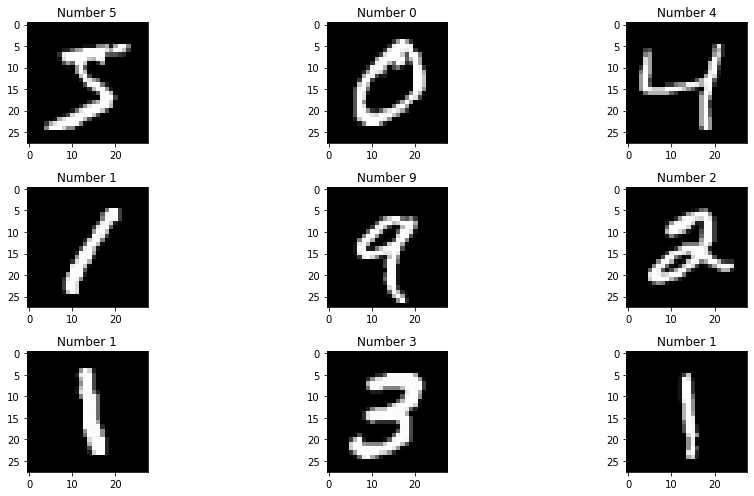

In [5]:
nshow = 9
plt.figure(figsize=(14,7))
for i in range(nshow):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
    plt.title('Number {}'.format(train_y[i]))
plt.tight_layout()                                 # ajuste para que no se emplamen los labels

El conjunto de datos debe ser pre-procesado antes de entrenar la red. Si se inspecciona la primera imagen en el set de entrenamiento, se encontra que los valores de los pixeles estan entre 0 y 255:

In [6]:
np.set_printoptions(linewidth=200)
print('Min =',np.min(train_X),'\nMax =',np.max(train_X))
print('EL número es: ',train_y[0])
print(train_X[0])

Min = 0 
Max = 255
EL número es:  5
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 25

Estos son los números mínimo y máximo que se encuentran dentro de cada pixel de las imágenes. Siguiendo el tutotrial de James y los tips de los tutoriales de tensorflow, se deben normalizar los datos.

Escalar los valores en un rango de 0 a 1 antes de alimentarlos al modelo de la red neuronal. Para hacerlo, divida los valores por 255. Es importante que el conjunto de entrenamiento y el conjunto de prueba se pre-procesen de la misma forma:

In [7]:
train_X = train_X / 255.
test_X  = test_X / 255.

En este ejemplo veremos una red densa completamente conectada. Como primer paso pasaremos la matrices de datos de $28\times28$ a vectores de tamaño 784 para después pasarla por nuestra primera capa (layer), donde el número de deuronas esta capa se elejida por el usuario (es recomdable jugar con este número), finalmente pondremos una capa de salida con 10 neuronas, la cual coincide con el número de objetos que deseamos clasificar.

Además usaremos como función de activación la función Rectified Lineal Unit (ReLU).

In [8]:
n_units = 128
activation = 'relu'   

In [9]:
layers = [
  tf.keras.layers.Flatten(input_shape=(28, 28, 1)),       # transfoma las matrices de datos en vectores
  tf.keras.layers.Dense(n_units, activation=activation),  # primera capa con 128 neuronas
]

Como ya mencionamos antes, se desea clasificar una imagen (con algún número) a partir de 10 clases distintas (núemros que van de 0-9). Para esto usaremos la función de activación SOFTMAX, la cual nos ayudara a que los datos de salida en la última capa (con 10 neuronas) sean probabilidades, así cuando en alguna de las 10 neuronas de salida se tenga la probabilidad más alta, entonces esta corresponderá al valor del número que se deseaba clasificar.

Para ser un poco más claro, se tiene vector de salida $Y = (y_{0},y_{1},\cdots,y_{9})$, donde cada $y_{i}$ es la probabilidad de que la imagen sea el dígito "i", es decir: 

\begin{equation}
y_{i} = P(Imagen\enspace muestre\enspace el\enspace dígito\enspace "i").
\end{equation}

La funció de activación SOFTMAX es una generalización de la función logística (lacual funciona para clasificar únicamento dos clases distintas). Esta función transforma un conjunto de datos en valores entre 0-1, logrando así 
verlo como probabilidades normalizadas. La función SOFTMAX tiene la siguiente forma:

\begin{equation}
P_{i} = \frac{e^{z_{i}}}{\displaystyle\sum_{k=1}^{N}e^{z_{k}}}.
\end{equation}

Dado que es una probabilidad normalizada, entonces se cumple que:

$\displaystyle\sum_{k=1}^{N}P_{k} = 1.0 $

$0.0 < P_{i} < 1.0$

In [10]:
layers += [
  tf.keras.layers.Dense(10, activation='softmax')
]

Ahora trabajaremos con capas de manera secuancial.

In [11]:
model = tf.keras.models.Sequential(layers)

Se usará como optimizador el algoritmo Adam, el cual requiere de una taza de aprendizaje al igual que lo hace el desenso del grandiente. Además elejiremos un número pequeño de epocas (tiempo de entremiento de nuestra red) para que no sea muy tardado, pero ya veremos que es sufieciente para tener un buen entrenamiento.

In [12]:
learning_rate = 0.001
n_epochs = 5

La función de costo sobre bloques de multiples muestras de tamaño $n$, puede ser calculada como:

$$
\begin{equation}
\xi(Y^{r},Y^{p}) = -\sum_{i?1}^{n} \sum_{c=1}^{C}y^{r}_{ic}· \log (y^{p}_{ic}).
\end{equation}
$$

In [13]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    metrics = ['sparse_categorical_crossentropy',
                  'accuracy']
    #metrics=['accuracy']
)

In [14]:
# Print the model summary

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Entrenemos el modelo.

In [15]:
historia = model.fit(train_X,train_y,epochs=n_epochs,)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4358 - sparse_categorical_crossentropy: 0.4358 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1241 - sparse_categorical_crossentropy: 0.1241 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0785 - sparse_categorical_crossentropy: 0.0785 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0615 - sparse_categorical_crossentropy: 0.0615 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0446 - sparse_categorical_crossentropy: 0.0446 - accuracy: 0.9860


Ya tenemos a la red entrenada y parece tener una buena precición, ahora lo que toca es hacer predicciones, para usaremos los datos de prueba.

In [16]:
y_pred = np.argmax(model.predict(test_X),axis=1)

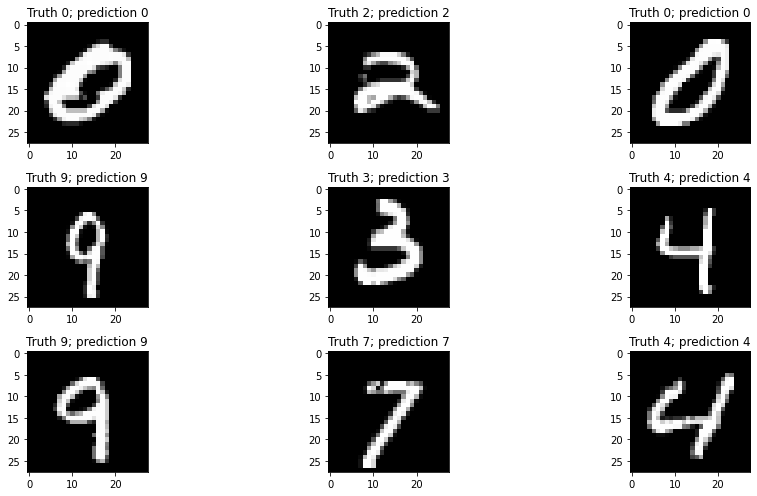

In [17]:
nshow = 9
toshow = np.random.choice(np.arange(test_X.shape[0]), size=nshow, replace=False)
plt.figure(figsize=(14,7))
for i in range(nshow):  
    plt.subplot(330 + 1 + i)
    plt.imshow(test_X[toshow[i]], cmap=plt.get_cmap('gray'))
    plt.title('Truth {}; prediction {}'.format(test_y[toshow[i]],y_pred[toshow[i]]))
plt.tight_layout() 

Ejemplo de lo que hace esta red neuronal.

<img src="ima_tuto/digits_recog.gif" width="600" height="450" align="center"/>

In [18]:
acc = (y_pred == test_y).sum()/len(test_y)
print('Accuracy = {:2.2%}'.format(acc))

Accuracy = 97.45%


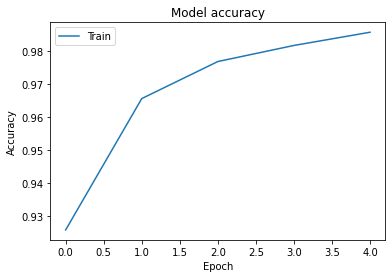

In [19]:
plt.title('Model accuracy')
plt.plot(historia.history['accuracy'], label='Train')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

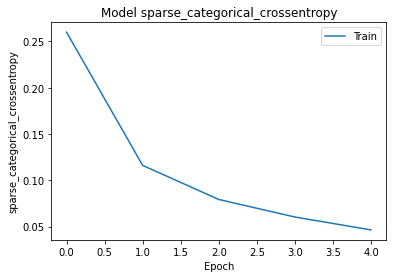

In [20]:
plt.title('Model sparse_categorical_crossentropy')
plt.plot(historia.history['sparse_categorical_crossentropy'], label='Train')
plt.ylabel('sparse_categorical_crossentropy')
plt.xlabel('Epoch')
plt.legend()

# Redes Neuronales Convolucionales

Las redes neuronales convolucionales (CNN por sus siglas en inglés, Convolutional Neural Networks) son un tipo especial de redes neuronales para procesar datos que tienen una topología cuadricular conocida. Algunos ejemplos de estos son los datos de series de tiempo que pueden ser vistos como una cuadrícula 1D tomando muestras en intervalos de tiempo regulares, datos de imágenes, que pueden ser pensados como cuadrículas 2D de píxeles. Como el nombre lo indica, la red emplea una operación matemática llamda convolución. Las *redes convolucionales* son simplemente redes neuronales que usan convoluciones en lugar de usar multiplicaciones de matrices como lo hacen las redes ordinarias.

En este tutorial no se pretende dar una explicación exacta de lo que es una convolución, ya que su deficnición formal es puramente matemática, además en las redes neuronales convolucionales esta operación no corresponde exactamente a la definición de convolución que se usa en matemáticas. En palabras simples una *Convolución* es el proceso de distribución de una función en cada punto de otra función. En terminología de redes convolucionales, la primera función para la convolución es frecuentemente referida con los *datos de entrada* y la segunda función referida como *kernel*.

<img src="ima_tuto/Cnn_conv.gif" width="400" height="400" align="left"/>
<img src="ima_tuto/convV2.gif" width="400" height="400" align="right"/>

En las redes convolucionales hay 3 ideas importantes que ayudan a mejorar el aprendizaje automático: *interacciones esacasas, parámetros compartidos y representación equivariante*. 

- *Interaciones escasas*: En las capas de redes neuronales tradicionales se utilizan las multiplicaciones de matrices para describir la interación de los datos de entrada y los datos de salida. Esto significa que cada valor de salida interactua con cada valor de entrada. En las redes convolucionales, sin embargo, típicamente tienen interacciones escasas, esto es mediado por el tamaño del kernel. Por ejemplo, cuando se procesa una imagen, la imagen de entrada puede tener miles o millones de píxeles, pero se puede detectar características pequeñas y significativas, como bordes con *kernels* que ocupan decenas o cientos de píxeles. Esto significa que solo se necesitan almacenar pocos parámetros, lo cual reducirá significativamente el tiempo de entrenamiento. 

- *Parámetros compartidos*: se refiere al uso del mismo parámetro para más de una función en el mismo modelo. En una red neuronal tradicional, cada elemento de la matriz de pesos se usa exactamente una vez al calcular la salida de una capa, se multiplica por un elemento de la entrada y luego nunca se vuelve a visitar. Como sinónimo de compartir parámetros, se puede decir que una red tiene pesos vinculados, porque el valor del peso aplicado a una entrada está vinculado al valor de un peso aplicado en otra parte. En una red neuronal convolucional, cada miembro del *kernel* se usa en cada posición de los datos de entrada. El uso compartido de parámetros utilizado por la operación de convolución significa que, en lugar de aprender un conjunto de parámetros separado para cada ubicación, aprendemos solo un conjunto. 

- *Representación equivariante*: En el caso de la convolución, la forma particular de compartir parámetros hace que la capa tenga una propiedad llamada equivariancia a la traslación. Decir que una función es equivariante significa que si la entrada cambia, la salida cambia de la misma manera. Al procesar datos de series de tiempo, esto significa que la convolución produce una especie de línea de tiempo que muestra cuándo aparecen diferentes características en la entrada. Si movemos un evento más tarde en el tiempo en la entrada, aparecerá exactamente la misma representación en la salida, justo más tarde en el tiempo. De manera similar con las imágenes, la convolución crea un mapa 2-D de dónde aparecen ciertas características en la entrada. Si movemos el objeto en la entrada, su representación se moverá la misma cantidad en la salida. Al procesar imágenes, es útil detectar bordes en la primera capa de una red convolucional, y un borde se ve igual independientemente de dónde aparezca en la imagen. Tenga en cuenta que la convolución no es equivalente a algunas otras transformaciones, como los cambios en la escala o la rotación de una imagen. Se necesitan otros mecanismos para manejar este tipo de transformaciones. 

Una capa típica de una red convolucional consta de tres etapas. En la primera etapa, la capa realiza varias convoluciones en paralelo para producir un conjunto de activaciones. En la segunda etapa, cada activación se ejecuta a través de una función de activación no lineal, como la función de activación lineal rectificada. Esta etapa a veces se denomina *etapa de detección*. En la tercera etapa, usamos una *función de agrupación* (pooling function) para modificar aún más la salida de la capa. Una función de agrupación reemplaza la salida de la red en una ubicación determinada con una estadística resumida de las salidas cercanas. Por ejemplo, la operación de *agrupación máxima* (max pooling) informa la salida máxima dentro de una vecindad rectangular. Otras funciones de agrupación populares incluyen el promedio de un vecindario rectangular, la norma L2 de un vecindario rectangular o un promedio ponderado basado en la distancia desde el píxel central.

En todos los casos, la agrupación ayuda a que la representación se vuelva *invariante* a las pequeñas tralaciones de la entrada. Esto significa que si traladamos la entrada en una pequeña cantidad, los valores de la mayoría de las salidas agrupadas no cambian. *La invariancia de la traslación local puede ser una propiedad muy útil si nos preocupamos más por si alguna característica está presente, que exactamente dónde está*. 

<img src="ima_tuto/maxpool_animation.gif" width="600" height="400" align="center"/>

<img src="ima_tuto/6cnn.png" width="600" height="400" align="center"/>

Veamos como implementar una red neuronal convolucional simple.

In [21]:
# Convertir un vector de clase (enteros) en una matriz de clase binaria. 
y_train_oh = tf.keras.utils.to_categorical(train_y)
y_test_oh = tf.keras.utils.to_categorical(test_y)
# Hacer a los datos de entramiento variables de tipo float32
x_train = train_X.astype(np.float32)
x_test = test_X.astype(np.float32)

Entrenaremos un modelo de clasificador CNN determinista estándar antes de implementar las redes neuronales bayesianas. Se debe crear el modelo determinista utilizando la API (del inglés API: Application Programming Interface) secuencial de acuerdo con las siguientes especificaciones (siéntase libre de modificar la secuancia):

- Se tomará una capa Conv2D con 8 filtros, tamaño de kernel de 5x5, activación de ReLU y relleno 'VÁLIDO' (significa que no habra rellenado). Por el momento no se agregarán 'strides'.
  - Esta capa debe fijar el input_shape de acuerdo con el argumento de la función.
- Como segunda capa se tomará una capa MaxPooling2D con un tamaño de ventana de 6x6.
- La tercera capa debe ser una capa de Aplanamiento.
- La capa final debe ser una capa densa con 10 neuronas y activación softmax.

En total, la red tendrá 4 capas.

Luego, el modelo debe compilarse con la función de pérdida, el optimizador y la lista de métricas proporcionadas en los argumentos de la función. 

In [22]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def get_deterministic_model(input_shape, loss, optimizer, metrics):
    """
    This function should build and compile a CNN model according to the above specification. 
    The function takes input_shape, loss, optimizer and metrics as arguments, which should be
    used to define and compile the model.
    Your function should return the compiled model.
    """
    model = Sequential([
        Conv2D(8, 5, activation='relu', padding='valid', input_shape=input_shape),
        MaxPooling2D(6),
        Flatten(),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [23]:
# Ejecute la función de arriba para obtener el modelo de referencia. 

tf.random.set_seed(0)
deterministic_model = get_deterministic_model(
    input_shape=(28, 28, 1), 
    loss=SparseCategoricalCrossentropy(), 
    optimizer=RMSprop(), 
    metrics=['accuracy']
)

In [24]:
# Resumen del modelo.

deterministic_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,498
Trainable params: 1,498
Non-trainable params: 0
_________________________________________________________________


In [25]:
x_train.shape

(60000, 28, 28)

In [26]:
# Se debe agregar una nueva dimención que especifique el número de canales, para este caso es 1, de lo contrario 
# habrá un error.
x_train = x_train.reshape(60000,28,28,1)

In [27]:
# Entrenar el modelo.

deterministic_model.fit(x_train, train_y, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.8864 - accuracy: 0.7519
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1497 - accuracy: 0.9550
Epoch 3/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1187 - accuracy: 0.9635
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1052 - accuracy: 0.9680
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0913 - accuracy: 0.9719


In [28]:
# Se debe agregar una nueva dimención que especifique el número de canales, para este caso es 1, de lo contrario 
# habrá un error.
x_test = x_test.reshape(10000,28,28,1)

In [29]:
# Evaluar el modelo.

print('Accuracy on MNIST test set: ',
      str(deterministic_model.evaluate(x_test, test_y, verbose=False)[1]))

Accuracy on MNIST test set:  0.9740999937057495


In [30]:
y_predC = np.argmax(model.predict(x_test),axis=1)

In [31]:
accC = (y_predC == test_y).sum()/len(test_y)
print('Accuracy = {:2.2%}'.format(accC))

Accuracy = 97.45%


In [32]:
x_test = x_test.reshape(10000,28,28)

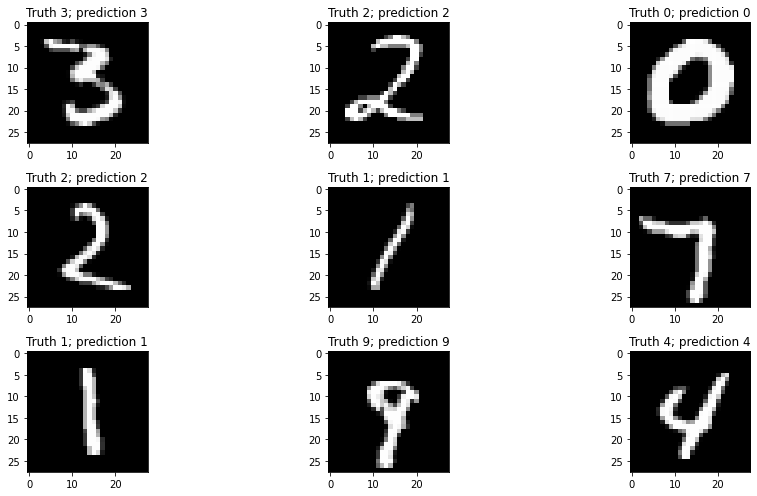

In [33]:
nshow = 9
toshow = np.random.choice(np.arange(x_test.shape[0]), size=nshow, replace=False)
plt.figure(figsize=(14,7))
for i in range(nshow):  
    plt.subplot(330 + 1 + i)
    plt.imshow(x_test[toshow[i]], cmap=plt.get_cmap('gray'))
    plt.title('Truth {}; prediction {}'.format(test_y[toshow[i]],y_predC[toshow[i]]))
plt.tight_layout() 

<img src="ima_tuto/7cnn.gif" width="600" height="400" align="center"/>

# Bayesian Convolutional Neural Networks